# Definición de Proyecto GRD

## 1. Integrantes del grupo
- Estudiante 1: Luis Nicolas Pino
- Estudiante 2: Marcial Ibáñez


## 2. Título tentativo del proyecto
Análisis de la distribución de recursos hospitalarios en el sistema de salud pública basado en GRD Chile 2024


## 3. Declaración del problema desde el usuario
Los servicios de salud pública deben mantener una administración eficiente de sus recursos para garantizar una atención continua y de calidad a la población chilena. 
Para lograr dicha eficiencia, es fundamental realizar análisis constantes sobre las características de la población del país y su experiencia con el sistema de salud pública.

La falta de análisis continuos impide una asignación de recursos contingente a las necesidades actuales, afectando la calidad y cobertura del sistema de salud pública en Chile.

## 4. Pregunta principal de investigación
¿Cómo afectan las caracteristicas fisiologicas de un paciente y el contexto de su condicion en el costo hospitalario producido por estos en el Servicio de Salud Público?

## 5. Preguntas secundarias (mínimo 2)
- Pregunta secundaria 1: ¿Cómo se ve afectado el peso hospitalario por los días de estancia?
- Pregunta secundaria 2: ¿Cuáles son los rangos etarios con mayor y menor costo asociado?
- Pregunta secundaria 3: ¿Cómo se relaciona el tipo de ingreso con la edad del paciente, y de qué manera afectan al costo hospitalario?

## 6. Variables principales y justificación de selección
- Variable 1: Peso - Justificación: El proyecto se enfoca en estudiar su comportamiento y el efecto en las demás variables
- Variable 2: Días de estancia - Justificación: Variable para estudiar el efecto de la duración de la estancia en los recursos hospitalarios.
- Variable 3: Edad  - Justificación: variable para clasificar a la población en grupos etarios y estudiar el comportamiento de cada grupo.
- (Opcional) Variable 4: Sexo - Justificación: variable para clasificar biologicamente a los pacientes y analizar comportamientos.
- (Opcional) Variable 5: Tipo Ingreso - Justificación: variable para observar el efecto del contexto del ingreso en el costo y cómo este afecta a los demás.

## 7. Metodología estadística propuesta

- Método 1: Estadística Descriptiva- Propósito: Conocer el comportamiento de las variables individualmente.
- Método 2: Estadística multivariada- Propósito: Relacionar el comportamiento de varias variables (Peso, Tipo Ingreso, Edad) y cómo se influyen entre ellas, esto para poder justificar mejor las respuestas a nuestras preguntas, además de proveer un análisis más completo.
- Método 3: Estadística inferencial- Propósito: Sacar conclusiones y predicciones respecto a los datos.

-Método 1: test ANOVA (Análisis de Varianza) - Comparar las medias de Peso a través de Grupos Etarios.

-Método 2: Regresión Lineal - Sacar predicciones respecto a la Peso y los días de estancia.

-Método 3: Correlación -  Verificar el tipo de relación entre las variables propuestas y si esta es positiva, negativa o nula.

## 8. Potencial impacto y aplicación práctica
Los resultados obtenidos de esta investigación influyen en la toma de decisiones de los administradores de servicios de salud, ayudará a enfocar los esfuerzos en los grupos que más lo requieran.

## 9. Supuestos estadísticos necesarios
- Supuesto 1: Relación entre edad (grupo etario) y peso - Forma de validación: Gráficos de correlación entre ambas variables y el levantamiento de estadísticos que lo demuestren
- Supuesto 2:  - El tipo de ingreso, asi como el sexo, son factores que influyen el peso
- Forma de validación: Crear gráficos que nos permitan concluir algún tipo de relación.

## 10. Limitaciones del estudio (sesgos)
Anticipe posibles limitaciones que podrían afectar la validez o generalización de sus resultados y cómo planean mitigarlas.

- Limitación 1: 	Sesgo Etario, puede haber un posible sesgo en la densidad y distribución de población en los rangos etarios, lo cual puede afectar el análisis y la regresión lineal.
-Estrategia de mitigación: observar lógicamente las distribuciones, y ver si se levantan patrones con o sin sentido del mundo real.

- Limitación 2: Sesgo de Sexo, las caracteristicas biologicas entre ambos grupos generan diferencia en la asignacion de recursos, debido a las distintas razones por las cuales ingresan. 
-Estrategia de mitigación: se revisará la distribución y se harán análisis separados para cada grupo. 

## 11. Cronograma detallado del proyecto
Defina claramente las actividades que realizarán en cada bloque de semanas según el calendario del curso.
- Semanas 4-5: Limpieza de datos y extracción de los datos útiles para el estudio
- Semanas 6-7: Análisis de variables individualmente por servicio de salud
- Semanas 8-9: Analisis multivariable e inicio de analisis inferencial
- Semanas 10-11: Análisis inferencial para predicciones
- Semana 12 (preparación final): Conclusiones a partir de la información obtenida

## Ideas
Agregar intervalos de confianza  
Regresion lineal para tratar de predecir resultados  
Regresion lineal para control de calidad (predecir resultado, comparar con original y ver que tan bien se aplicó el tratamiento)  
 

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm, gamma, expon, lognorm, chi2, kstest, anderson
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("deep")

# Opcional: semilla para reproducibilidad
np.random.seed(42)

In [95]:
df = pd.read_csv("data\GRD_2023_muestra_cancer_UCV_limpio.csv")

In [96]:
df = df[~df.isin(["DESCONOCIDO"]).any(axis=1)]
df = df[df["DIAS_ESTANCIA"] < 100]

In [97]:
bins = [0, 10, 18, 40, 65, float("inf")]
labels = ["0-10", "10-18", "19-40", "41-65", "66+"]

df["rango_etario"] = pd.cut(df["EDAD"], bins = bins, labels=labels, right=True, include_lowest = True)

In [98]:
df

,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHAALTA,TIPOALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,TIPO_FECHA_NACIMIENTO,TIPO_FECHA_INGRESO,TIPO_FECHAALTA,EDAD,DIAS_ESTANCIA,rango_etario
0,122100,72196813,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,064161,0.7094,1.0,1.0,YMD,DMY,DMY,43.0,2,41-65
2,114101,97627974,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,044161,0.4084,1.0,1.0,YMD,DMY,DMY,3.0,1,0-10
3,106103,67770674,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301,0.6406,1.0,1.0,YMD,DMY,DMY,45.0,1,41-65
4,106103,100390800,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,074131,0.5346,1.0,1.0,YMD,DMY,DMY,0.0,2,0-10
5,108100,72858368,MUJER,1964-12-20,ACONCAGUA,PROGRAMADA,2023-04-24,2023-04-24,DOMICILIO,M54.99,083110,0.1032,0.0,0.0,YMD,DMY,DMY,58.0,0,41-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,105102,78111817,MUJER,1995-12-06,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,131111,0.5227,1.0,1.0,YMD,DMY,DMY,27.0,3,19-40
1039583,118100,76593606,MUJER,1991-04-26,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,132340,0.1761,0.0,0.0,YMD,DMY,DMY,32.0,0,19-40
1039584,115100,100360940,HOMBRE,2015-01-08,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,061131,0.7398,1.0,1.0,YMD,DMY,DMY,9.0,2,0-10
1039585,123100,78557002,HOMBRE,2014-01-07,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,044181,0.3452,1.0,1.0,YMD,DMY,DMY,9.0,0,0-10


In [99]:
# Medidas de tendencia central
media = df["IR_29301_PESO"].mean()
mediana = df["IR_29301_PESO"].median()
moda = df["IR_29301_PESO"].mode()[0]

# Medidas de dispersión
desviacion_estandar = df["IR_29301_PESO"].std()
rango = df["IR_29301_PESO"].max() - df["IR_29301_PESO"].min()
percentiles = df["IR_29301_PESO"].quantile([0.25, 0.5, 0.75])

# Resultados
print("Medidas de tendencia central:")
print("Media :", media)
print("Media :", mediana)
print("Moda :", moda)

print("\nMedidas de dispersión:")
print("Desviacion_estandar :", desviacion_estandar)
print("Rango :", rango)
print("Quartiles (25%, 50%, 75%) :")
print(percentiles)

Medidas de tendencia central:
Media : 0.9498809052637277
Media : 0.6915
Moda : 0.4384

Medidas de dispersión:
Desviacion_estandar : 1.0457764457315188
Rango : 20.6461
Quartiles (25%, 50%, 75%) :
0.25    0.4726
0.50    0.6915
0.75    1.0328
Name: IR_29301_PESO, dtype: float64


### Remover outlier

## Analisis por variable

### Sexo

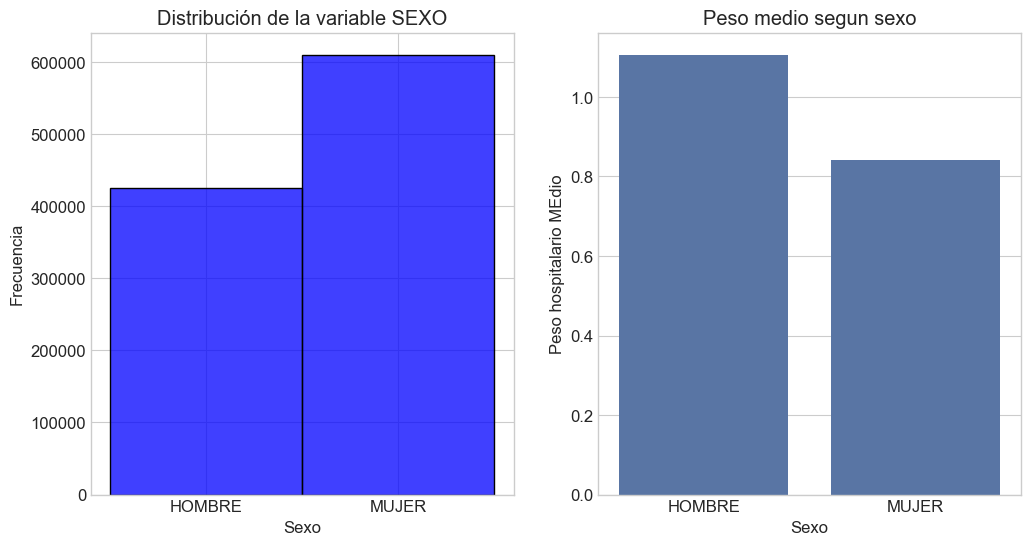

In [113]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['SEXO'], bins=50, color='blue')
plt.title('Distribución de la variable SEXO')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df_grouped = df.groupby('SEXO')['IR_29301_PESO'].mean().reset_index()

# Graficar
sns.barplot(x = df_grouped['SEXO'], y = df_grouped['IR_29301_PESO'])
plt.title("Peso medio segun sexo")
plt.xlabel("Sexo")
plt.ylabel("Peso hospitalario MEdio")
plt.show()

Podemos observar que a pesar de que los hombres menos registros en el dataset, estos tienen un peso medio mas alto que las mujeres

### Edad y rango etario

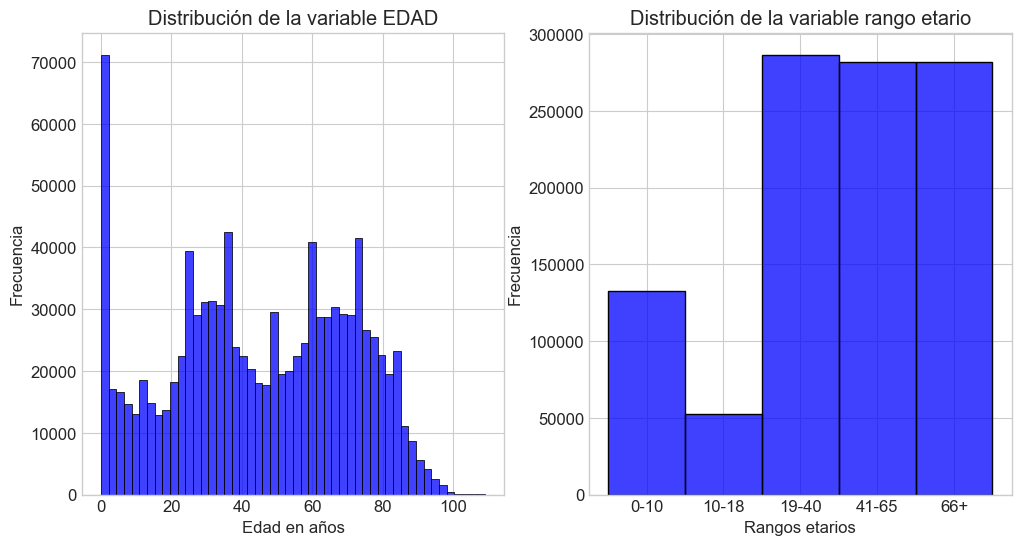

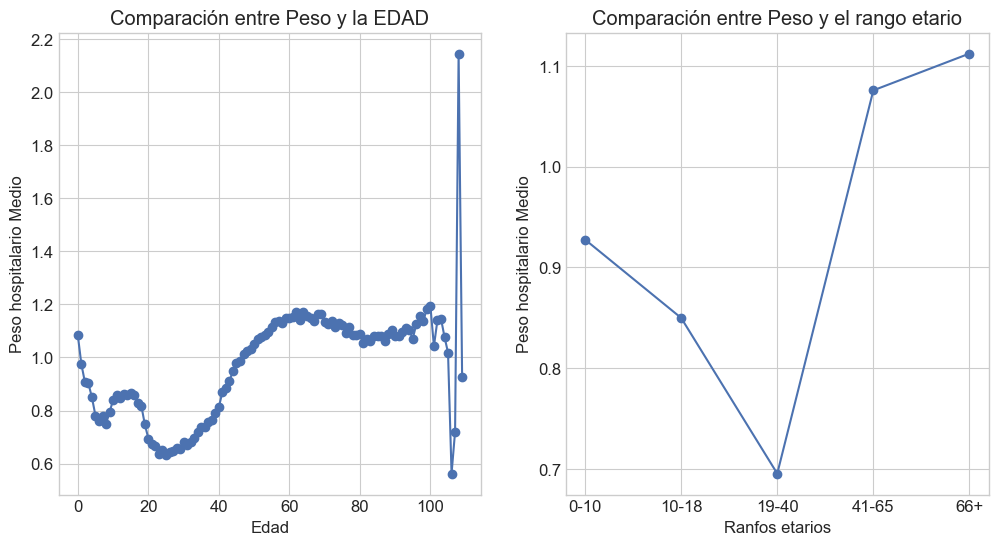

In [118]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['EDAD'], bins=50, color='blue')
plt.title('Distribución de la variable EDAD')
plt.xlabel('Edad en años')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['rango_etario'], color='blue')
plt.title('Distribución de la variable rango etario')
plt.xlabel("Rangos etarios")
plt.ylabel('Frecuencia')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_grouped = df.groupby('EDAD')['IR_29301_PESO'].mean().reset_index()

# Graficar
plt.plot(df_grouped['EDAD'], df_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y la EDAD")
plt.xlabel("Edad")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)

plt.subplot(1, 2, 2)
df_grouped = df.groupby('rango_etario')['IR_29301_PESO'].mean().reset_index()

# Graficar
plt.plot(df_grouped['rango_etario'], df_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y el rango etario")
plt.xlabel("Ranfos etarios")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()

### Tipo de ingreso

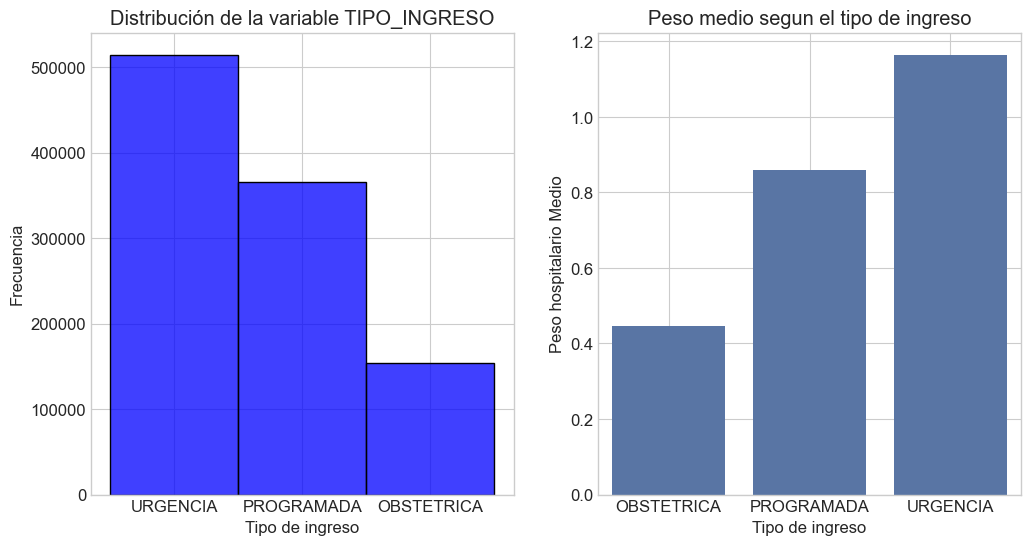

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['TIPO_INGRESO'], bins=50, color='blue')
plt.title('Distribución de la variable TIPO_INGRESO')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df_grouped = df.groupby('TIPO_INGRESO')['IR_29301_PESO'].mean().reset_index()
sns.barplot(x = df_grouped['TIPO_INGRESO'], y = df_grouped['IR_29301_PESO'])
plt.title("Peso medio segun el tipo de ingreso")
plt.xlabel("Tipo de ingreso")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()

### Dias de estancia

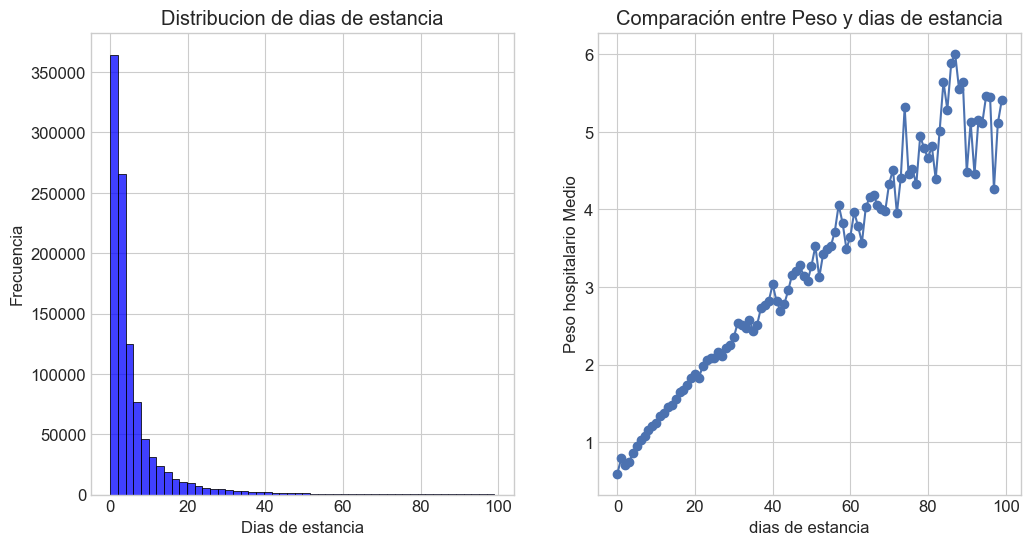

In [124]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['DIAS_ESTANCIA'], bins = 50, color='blue')
plt.title('Distribucion de dias de estancia')
plt.xlabel('Dias de estancia')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df_grouped = df.groupby('DIAS_ESTANCIA')['IR_29301_PESO'].mean().reset_index()

plt.plot(df_grouped['DIAS_ESTANCIA'], df_grouped['IR_29301_PESO'], marker='o', linestyle='-')
plt.title("Comparación entre Peso y dias de estancia")
plt.xlabel("dias de estancia")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)

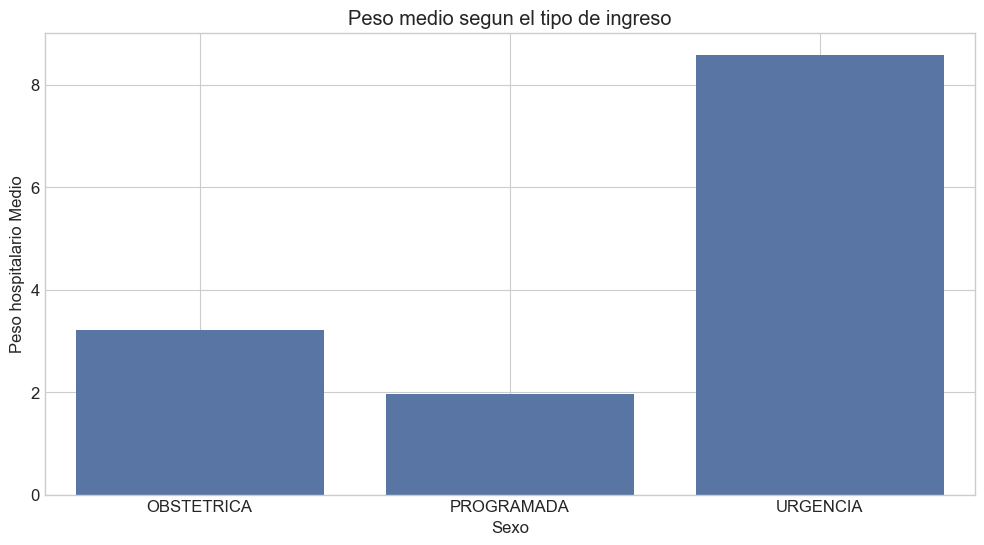

In [111]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('TIPO_INGRESO')['DIAS_ESTANCIA'].mean().reset_index()

# Graficar
sns.barplot(x = df_grouped['TIPO_INGRESO'], y = df_grouped['DIAS_ESTANCIA'])
plt.title("Peso medio segun el tipo de ingreso")
plt.xlabel("Sexo")
plt.ylabel("Peso hospitalario Medio")
plt.grid(True)
plt.show()